# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr, ggplot2)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [5]:
gliph_div.fx <- function(datapath, h4hpath, gliph_in_out){
load(file = paste0(datapath, "discovery_metadata.RData"))
load(file = paste0(h4hpath, "analysis/GLIPH/", gliph_in_out))
gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")
gliph_meta$disease[ is.na(gliph_meta$disease)] <- "Emerson_unknown"
pat_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, subject)))
return(pat_type)
}

In [7]:
load(file = paste0(datapath, "discovery_metadata.RData"))
discovery_metadata$disease[ is.na(discovery_metadata$disease)] <- "Emerson_unknown"
#load(file = paste0(h4hpath, "analysis/GLIPH/", "gliphinput_int_adaptive_sample_04_cluster_gliph_rm_na_singlerm.RData"))
#gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")

In [27]:
gliph_div.fx <- function(datapath, h4hpath, gliph_in_out){
    #load(file = paste0(datapath, "discovery_metadata.RData"))
    load(file = paste0(h4hpath, "analysis/GLIPH/", gliph_in_out))
    gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")
    #gliph_meta$disease[ is.na(gliph_meta$disease)] <- "Emerson_unknown"

    #get table of studies by type
 #   study_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, study)))
 #   #remove those with no INTERCEPT
 #   study_type <- study_type[study_type$INTERCEPT != 0,]    
 #   print(study_type)
    #get table of type, subject and study
    tmp <- as.data.frame(table(gliph_meta$type, gliph_meta$study, gliph_meta$subject), stringsAsFactors = F)
    tmp <- tmp[ tmp$Freq != 0,]
  #  print(head(tmp))
    #get table of studies by type
    studysamples_type <- as.data.frame.matrix(table(tmp %>% select(Var1, Var2)))
    #remove those with no INTERCEPT
    studysamples_type <- studysamples_type[studysamples_type$INTERCEPT != 0,]
   # print(head(studysamples_type) )
    #normalize to total number of samples in discovery set
    totalnumbers <- table(discovery_metadata$study)
    studysamples_type_norm <- t(apply(studysamples_type, 1, function(x)(x/totalnumbers[match(names(x), names(totalnumbers))])*100))
    return( studysamples_type_norm )
}

In [28]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.RData", full.names = FALSE)

In [29]:
filelist

[1] "gliphinput_int_adaptive_sample_01_cluster_gliph_rm_na_singlerm.RData"
 [2] "gliphinput_int_adaptive_sample_02_cluster_gliph_rm_na_singlerm.RData"
 [3] "gliphinput_int_adaptive_sample_03_cluster_gliph_rm_na_singlerm.RData"
 [4] "gliphinput_int_adaptive_sample_04_cluster_gliph_rm_na_singlerm.RData"
 [5] "gliphinput_int_adaptive_sample_05_cluster_gliph_rm_na_singlerm.RData"
 [6] "gliphinput_int_adaptive_sample_06_cluster_gliph_rm_na_singlerm.RData"
 [7] "gliphinput_int_adaptive_sample_09_cluster_gliph_rm_na_singlerm.RData"
 [8] "gliphinput_int_adaptive_sample_10_cluster_gliph_rm_na_singlerm.RData"
 [9] "gliphinput_int_adaptive_sample_11_cluster_gliph_rm_na_singlerm.RData"
[10] "gliphinput_int_adaptive_sample_12_cluster_gliph_rm_na_singlerm.RData"
[11] "gliphinput_int_adaptive_sample_13_cluster_gliph_rm_na_singlerm.RData"
[12] "gliphinput_int_adaptive_sample_14_cluster_gliph_rm_na_singlerm.RData"
[13] "gliphinput_int_adaptive_sample_15_cluster_gliph_rm_na_singlerm.RData"
[14] "gliphinput_int_adaptive_sample_17_cluster_gliph_rm_na_singlerm.RData"
[15] "gliphinput_int_adaptive_sample_18_cluster_gliph_rm_na_singlerm.RData"
[16] "gliphinput_int_adaptive_sample_19_cluster_gliph_rm_na_singlerm.RData"
[17] "gliphinput_int_adaptive_sample_20_cluster_gliph_rm_na_singlerm.RData"

In [34]:
mylist <- lapply(filelist, function(x){ gliph_div.fx(datapath, h4hpath, x )})

In [35]:
mylist <- lapply(mylist, function(x) as.data.frame(x))

In [36]:
lapply(mylist, function(x) x[which(x["INTERCEPT"] > 7),])

,Carey,Emerson,Henderson,INTERCEPT,Mitchell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
global-S%GGE,0.000000,8.858859,0.000000,7.142857,5.092593
global-S%GGTE,7.142857,4.804805,9.677419,7.857143,9.259259
global-S%GYE,14.285714,8.858859,6.451613,10.000000,8.333333
global-S%RET,0.000000,4.354354,6.451613,7.142857,3.240741
global-S%TDT,7.142857,7.957958,6.451613,7.857143,5.555556
global-S%TGE,0.000000,6.456456,6.451613,10.000000,4.629630
global-S%TVNTE,7.142857,4.654655,3.225806,7.142857,4.629630
global-SL%GE,14.285714,7.957958,4.838710,10.714286,4.166667
global-SL%YE,7.142857,7.057057,6.451613,10.714286,5.555556


In [42]:
# get average number of samples per study that share GLIPH groups with INTERCEPT
mylist_mean <- mylist %>% lapply(function(x) apply(x, 2, mean))

In [44]:
mylist_mean

[[1]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.357836  2.008805  1.385844  2.444521  1.840615 

[[2]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 3.290950  1.813594  2.136463  2.397158  1.837309 

[[3]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 4.246215  1.862000  1.664932  2.333772  1.792115 

[[4]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.933057  2.008530  1.955743  2.443064  1.807121 

[[5]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.169559  1.899329  1.884233  2.366489  1.862669 

[[6]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 3.502747  1.885539  1.915323  2.239011  1.333244 

[[7]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 5.223411  1.731026  1.762115  2.375708  1.713167 

[[8]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 4.285714  1.658145  1.865737  2.285714  1.841842 

[[9]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 4.048716  1.939497  1.702096  2.458855  1.834784 

[[10]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.448980  1.925497  1.950845  2.421769  1.717372 

[[11]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 3.216156  2.067513  2.170242  2.528048  1.653093 

[[12]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 1.708075  1.805066  1.872370  2.394410  1.696860 

[[13]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 3.095238  1.997712  2.204301  2.520408  1.624780 

[[14]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 4.128440  1.915448  2.545132  2.506553  1.739297 

[[15]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 4.314003  2.096156  2.267646  2.743989  2.195636 

[[16]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 1.877934  1.700997  1.408451  2.250168  1.990958 

[[17]]
    Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.849741  1.998631  1.721544  2.450037  1.871042

In [45]:
type_study_mean <- as.data.frame(do.call("rbind", mylist_mean))

In [46]:
head(type_study_mean)

,Carey,Emerson,Henderson,INTERCEPT,Mitchell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.357836,2.008805,1.385844,2.444521,1.840615
2,3.290950,1.813594,2.136463,2.397158,1.837309
3,4.246215,1.862000,1.664932,2.333772,1.792115
4,2.933057,2.008530,1.955743,2.443064,1.807121
5,2.169559,1.899329,1.884233,2.366489,1.862669
6,3.502747,1.885539,1.915323,2.239011,1.333244


In [47]:
type_study_m <- reshape2::melt(type_study_mean)

No id variables; using all as measure variables



In [48]:
head(type_study_m)

,variable,value
,<fct>,<dbl>
1,Carey,2.357836
2,Carey,3.290950
3,Carey,4.246215
4,Carey,2.933057
5,Carey,2.169559
6,Carey,3.502747


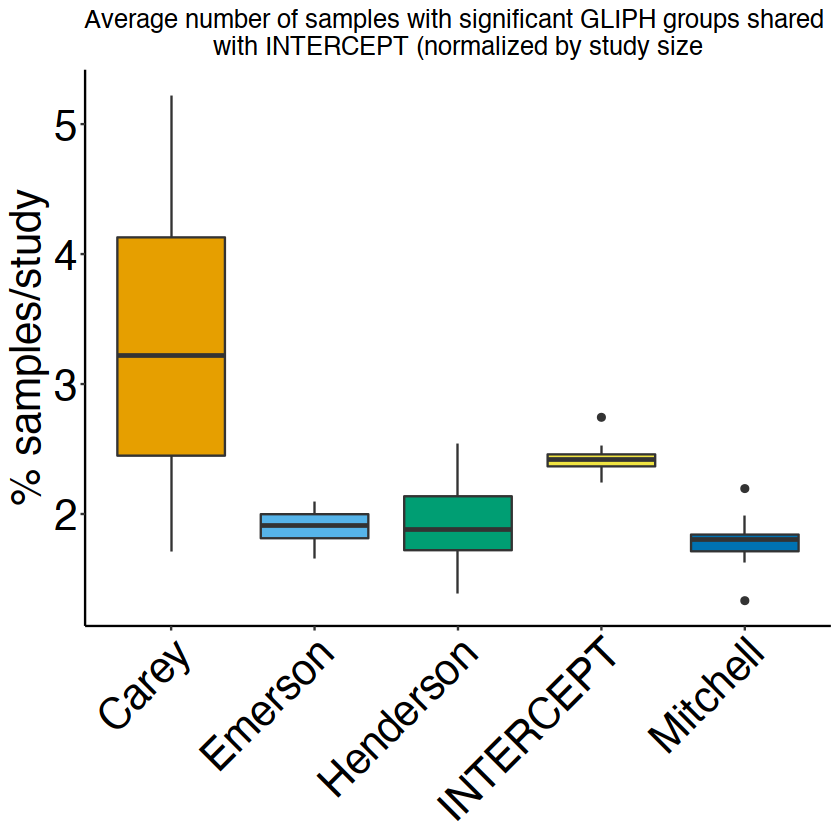

In [64]:
ggplot() + geom_boxplot(data = type_study_m, aes(x = variable, y = value, fill = variable)) + 
    scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")) + 
    myplot + myaxis + theme(legend.title = element_blank(), 
                            legend.position = "none", 
                            plot.title = element_text(hjust = 0.5, size = 15),
                            axis.title.x = element_blank()) +
    ylab("% samples/study") + guides(fill = guide_legend(ncol = 2)) +
    ggtitle("Average number of samples with significant GLIPH groups shared \nwith INTERCEPT (normalized by study size") 

compare number of samples in each disease type that share gliph groups with other samples

In [136]:
gliph_cancer.fx <- function(datapath, h4hpath, gliph_in_out){
    load(file = paste0(h4hpath, "analysis/GLIPH/", gliph_in_out))
    gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")
    #gliph_meta$disease[ is.na(gliph_meta$disease)] <- "Emerson_unknown"

    #get table of type, subject and study
    tmp <- as.data.frame(table(gliph_meta$type, gliph_meta$disease, gliph_meta$subject), stringsAsFactors = F)
    tmp <- tmp[ tmp$Freq != 0,]
    #print(head(tmp))
    #get table of studies by type
    studysamples_type <- as.data.frame.matrix(table(tmp %>% select(Var1, Var2)))
    #remove those with no INTERCEPT
    studysamples_type <- studysamples_type[studysamples_type$Solid != 0,]
    #print(head(studysamples_type) )
    #print(head(studysamples_type) )
    #normalize to total number of samples in discovery set
    totalnumbers <- table(discovery_metadata$disease)
    #print((totalnumbers))
    
    studysamples_type_norm <- t(apply(studysamples_type, 1, function(x)(x/totalnumbers[match(names(x), names(totalnumbers))])*100))
    return( studysamples_type_norm )

}

In [137]:
mylist <- lapply(filelist, function(x){ gliph_cancer.fx(datapath, h4hpath, x )})

In [138]:
mylist <- lapply(mylist, function(x) as.data.frame(x))
#lapply(mylist, function(x) x[which(x["Ctrl"] > 10),])

In [139]:
# get average number of samples per disease that share GLIPH groups with INTERCEPT (leu, lym, solid, lfs)
mylist_mean <- mylist %>% lapply(function(x) apply(x, 2, mean))

In [140]:
commonnames <- lapply(mylist_mean, names)
commondiease <- Reduce(intersect,commonnames)

In [141]:
commondiease

[1] "Ctrl"                 "Cytomegalovirus +"    "Cytomegalovirus -"   
 [4] "Emerson_unknown"      "KD"                   "LFS"                 
 [7] "Leukemia"             "Lymphoma"             "MIS-C SARSCoV2Neg"   
[10] "MIS-C SARSCoV2Pos"    "Peds COVID19"         "Peds febrile Control"
[13] "Peds healthy Control" "Solid"                "T1D"                 
[16] "sJIA"

In [142]:
type_disease_mean <- do.call(rbind, lapply(mylist_mean, function(x) x[match(names(mylist_mean[[1]]), names(x))]))

In [143]:
type_disease_mean_melt <- reshape2::melt(type_disease_mean)

In [144]:
pairwise.t.test(type_disease_mean_melt$value, type_disease_mean_melt$Var2, p.adj = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  type_disease_mean_melt$value and type_disease_mean_melt$Var2 

                     Ctrl    Cytomegalovirus + Cytomegalovirus -
Cytomegalovirus +    0.7652  -                 -                
Cytomegalovirus -    0.7041  0.9353            -                
Emerson_unknown      0.5849  0.8045            0.8678           
KD                   0.9287  0.6979            0.6389           
LFS                  0.8148  0.5942            0.5393           
Leukemia             0.0376  0.0176            0.0141           
Lymphoma             0.3546  0.2212            0.1921           
MAS                  0.0685  0.0346            0.0284           
MIS-C SARSCoV2Neg    0.6877  0.4837            0.4345           
MIS-C SARSCoV2Pos    0.7785  0.9861            0.9215           
Normal               5.9e-12 3.5e-11           5.5e-11          
Peds COVID19         0.4652  0.6658            0.7258           
Peds febrile Control 0.2230  0.

In [145]:
head(type_disease_mean_melt)

,Var1,Var2,value
,<int>,<fct>,<dbl>
1,1,Ctrl,2.239975
2,2,Ctrl,2.649665
3,3,Ctrl,3.177234
4,4,Ctrl,2.647674
5,5,Ctrl,2.491849
6,6,Ctrl,2.079272


Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."


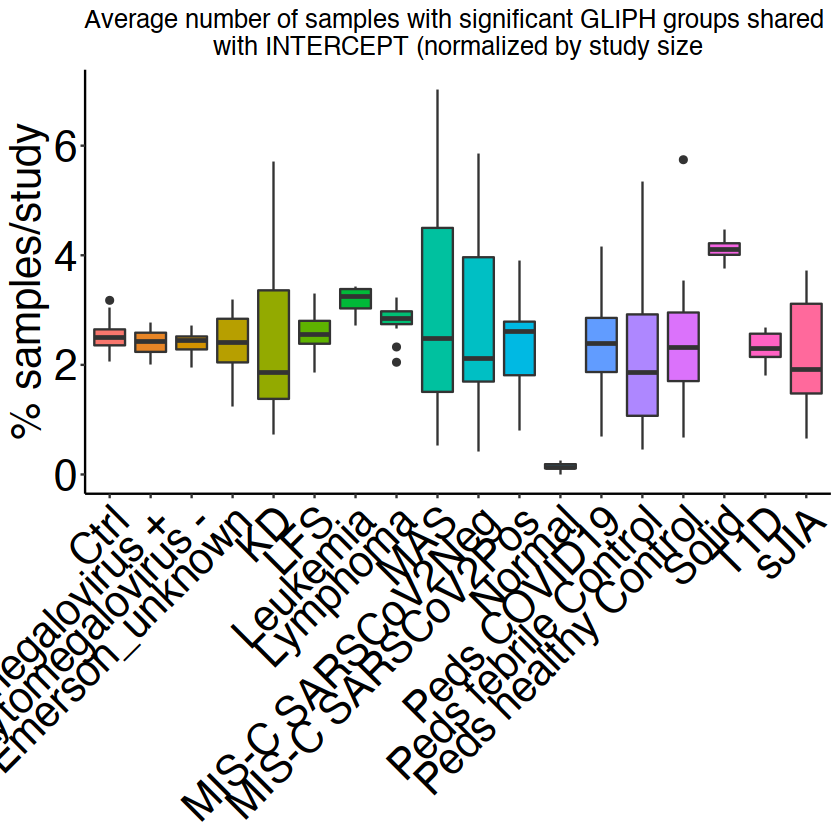

In [146]:
ggplot() + geom_boxplot(data = type_disease_mean_melt, aes(x = Var2, y = value, fill = Var2)) + 
    #scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")) + 
    myplot + myaxis + theme(legend.title = element_blank(), 
                            legend.position = "none", 
                            plot.title = element_text(hjust = 0.5, size = 15),
                            axis.title.x = element_blank()) +
    ylab("% samples/study") + guides(fill = guide_legend(ncol = 2)) +
    ggtitle("Average number of samples with significant GLIPH groups shared \nwith INTERCEPT (normalized by study size") 

In [188]:
discovery_metadata[ discovery_metadata$Agegroup == "Neonate",]

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
15,Infant_1_NWK51,0,PBMC,Carey,Neonate,NA,Ctrl,Infant_1_NWK51
16,Infant_2_NWK134,0,PBMC,Carey,Neonate,NA,Ctrl,Infant_2_NWK134
17,Infant_3_NWK39,0,PBMC,Carey,Neonate,NA,Ctrl,Infant_3_NWK39
18,Infant_4_NWK174,0,PBMC,Carey,Neonate,NA,Ctrl,Infant_4_NWK174
19,Infant_5_NWK31,0,PBMC,Carey,Neonate,NA,Ctrl,Infant_5_NWK31
85,Subject 021,0,PBMC,Mitchell,Neonate,Female,T1D,310204_TCRB
96,Control 019,1,PBMC,Mitchell,Neonate,Male,Ctrl,310268_TCRB
101,Subject 003,0,PBMC,Mitchell,Neonate,Female,T1D,310110_TCRB
115,Subject 014,1,PBMC,Mitchell,Neonate,Male,T1D,310272_TCRB


In [161]:
discovery_metadata$Agegroup[grepl("Preterm", discovery_metadata$sample_name)] <- "Preterm"

In [173]:
discovery_metadata$Agegroup[ which(discovery_metadata$Agegroup == "Years")] <- NA

In [174]:
gliph_age.fx <- function(datapath, h4hpath, gliph_in_out){
    load(file = paste0(h4hpath, "analysis/GLIPH/", gliph_in_out))
    gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")

    #get table of type, subject and study
    tmp <- as.data.frame(table(gliph_meta$type, gliph_meta$Agegroup, gliph_meta$subject), stringsAsFactors = F)
    tmp <- tmp[ tmp$Freq != 0,]
    #print(head(tmp))
    #get table of studies by type
    studysamples_type <- as.data.frame.matrix(table(tmp %>% select(Var1, Var2)))
    #normalize to total number of samples in discovery set
    totalnumbers <- table(discovery_metadata$Agegroup)
    #print((totalnumbers))
    
    studysamples_type_norm <- t(apply(studysamples_type, 1, function(x)(x/totalnumbers[match(names(x), names(totalnumbers))])*100))
    return( studysamples_type_norm )

}

In [175]:
mylist <- lapply(filelist, function(x){ gliph_age.fx(datapath, h4hpath, x )})

In [176]:
mylist <- lapply(mylist, function(x) as.data.frame(x))


In [177]:
mylist_mean <- mylist %>% lapply(function(x) apply(x, 2, mean))

In [178]:
mylist_mean

[[1]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.570513    1.798923    1.688963    1.322702    1.634615    1.528846 

[[2]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   2.058030    1.554546    1.717347    1.826800    5.263158    1.163968 

[[3]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.409314    1.665615    1.642423    2.008608    3.768382    1.718750 

[[4]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.238036    1.697652    1.725085    1.525532    2.434457    1.825843 

[[5]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
  2.8305872   1.7226137   1.6841627   1.7991283   1.1406844   0.9695817 

[[6]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.125304    1.683116    1.465805    1.068186    7.208029    1.614964 

[[7]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.559454    1.597560    1.650458    1.608900    6.929825    1.438596 

[[8]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
  1.5857393   1.5019285   1.6058285   1.4211638   6.4960630   0.8956693 

[[9]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   2.075702    1.720702    1.704093    1.465201    5.860806    1.575092 

[[10]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.045510    1.792542    1.639459    1.539015    2.398524    1.642066 

[[11]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.388889    1.816704    1.682609    1.492683    5.900000    1.010000 

[[12]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.679375    1.594152    1.591361    1.394867    3.104575    1.348039 

[[13]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.734858    1.730896    1.669675    1.567315    1.985560    1.904332 

[[14]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   2.186121    1.699114    1.790339    1.690587    5.324910    1.173285 

[[15]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   1.929601    1.781745    1.888691    2.392478    4.484733    2.423664 

[[16]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   2.139092    1.509285    1.600682    2.082962    4.288321    1.222628 

[[17]]
 Adolescent       Adult       Child     Neonate     Preterm Young Adult 
   2.022137    1.608676    1.659587    1.616671    4.501916    2.059387

In [179]:
type_age_mean <- do.call(rbind, lapply(mylist_mean, function(x) x[match(names(mylist_mean[[1]]), names(x))]))

In [180]:
type_age_mean_melt <- reshape2::melt(type_age_mean)

In [181]:
head(type_age_mean_melt)

,Var1,Var2,value
,<int>,<fct>,<dbl>
1,1,Adolescent,1.570513
2,2,Adolescent,2.058030
3,3,Adolescent,1.409314
4,4,Adolescent,1.238036
5,5,Adolescent,2.830587
6,6,Adolescent,1.125304


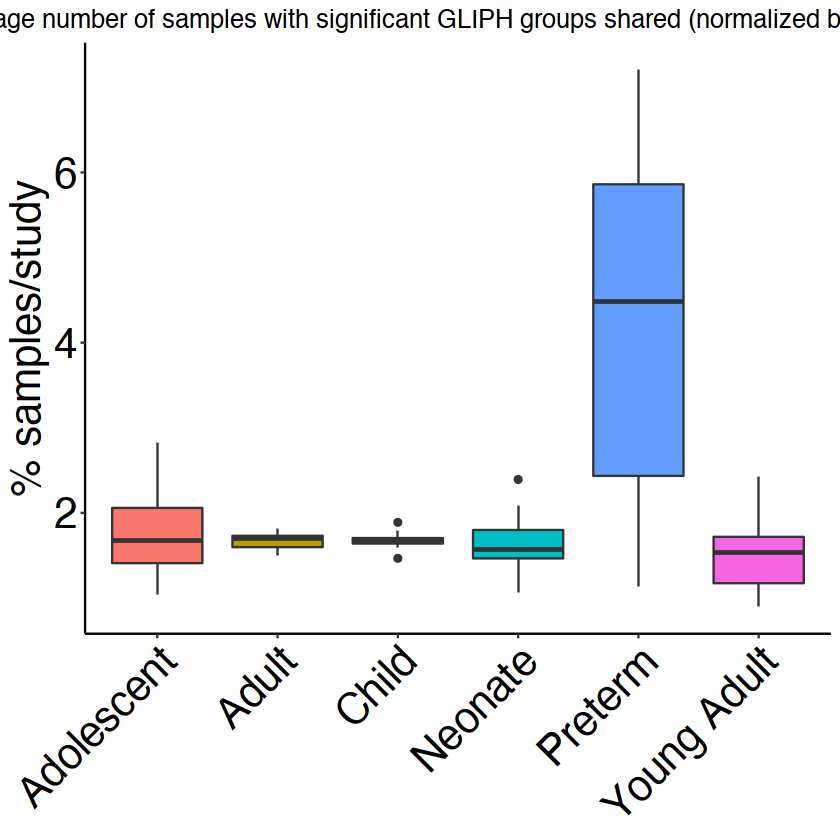

In [184]:
ggplot() + geom_boxplot(data = type_age_mean_melt, aes(x = Var2, y = value, fill = Var2)) + 
    #scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")) + 
    myplot + myaxis + theme(legend.title = element_blank(), 
                            legend.position = "none", 
                            plot.title = element_text(hjust = 0.5, size = 15),
                            axis.title.x = element_blank()) +
    ylab("% samples/study") + guides(fill = guide_legend(ncol = 2)) +
    ggtitle("Average number of samples with significant GLIPH groups shared (normalized by study size") 

In [14]:
length(unique(gliph_meta$type))

[1] 267

In [17]:
#get table of studies by type
study_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, study)))
#remove those with no INTERCEPT
study_type <- study_type[study_type$INTERCEPT != 0,]

In [20]:
colnames(gliph_meta)

[1] "subject"            "Sample"             "index.x"           
 [4] "pattern"            "Fisher_score"       "number_subject"    
 [7] "number_unique_cdr3" "final_score"        "hla_score"         
[10] "vb_score"           "expansion_score"    "length_score"      
[13] "cluster_size_score" "type"               "TcRb"              
[16] "V"                  "J"                  "TcRa"              
[19] "Freq"               "CDR3b"              "TRBV"              
[22] "TRBJ"               "count"              "clonefraction"     
[25] "file"               "index.y"            "Patient"           
[28] "Age"                "sampletype"         "study"             
[31] "Agegroup"           "Sex"                "disease"

In [34]:
#get table of type, subject and study
tmp <- as.data.frame(table(gliph_meta$type, gliph_meta$study, gliph_meta$subject), stringsAsFactors = F)
tmp <- tmp[ tmp$Freq != 0,]

In [35]:
tmp[ tmp$Var1 == "global-SV%TGGTGE",]

,Var1,Var2,Var3,Freq
,<chr>,<chr>,<chr>,<int>
194621,global-SV%TGGTGE,INTERCEPT,CHP-353-04-PBMC-DNA,3
358826,global-SV%TGGTGE,INTERCEPT,LFS_TCR-5067-PBMC-DNA,1
647987,global-SV%TGGTGE,Emerson,P00258,1
825542,global-SV%TGGTGE,Emerson,P00436,1
893627,global-SV%TGGTGE,Emerson,P00502,1


In [36]:
study_type["global-SV%TGGTGE",]
# study_type just sums number of cdr3s. I want number of patients.

,Carey,Emerson,Henderson,INTERCEPT,Mitchell
,<int>,<int>,<int>,<int>,<int>
global-SV%TGGTGE,0,3,0,4,0


In [38]:
tmptmp <- as.data.frame(table(tmp$Var1, tmp$Var2), stringsAsFactors = F)
tmptmp <- tmptmp[ tmptmp$Freq != 0,]

In [40]:
head(tmptmp)

,Var1,Var2,Freq
,<chr>,<chr>,<int>
3,global-%DTATNEK,Carey,1
4,global-%E,Carey,2
7,global-%RDTYE,Carey,1
11,global-%STDT,Carey,1
15,global-GGD%E,Carey,1
21,global-R%NTGE,Carey,1


In [41]:
tmptmp[ tmptmp$Var1 == "global-SV%TGGTGE",]

,Var1,Var2,Freq
,<chr>,<chr>,<int>
512,global-SV%TGGTGE,Emerson,3
1046,global-SV%TGGTGE,INTERCEPT,2


In [47]:
#get table of studies by type
studysamples_type <- as.data.frame.matrix(table(tmp %>% select(Var1, Var2)))

#remove those with no INTERCEPT
studysamples_type <- studysamples_type[studysamples_type$INTERCEPT != 0,]

In [48]:
studysamples_type["global-SV%TGGTGE",]

,Carey,Emerson,Henderson,INTERCEPT,Mitchell
,<int>,<int>,<int>,<int>,<int>
global-SV%TGGTGE,0,3,0,2,0


In [51]:
#normalize to total number of samples in discovery set
totalnumbers <- table(discovery_metadata$study)

In [57]:
(totalnumbers)


    Carey   Emerson Henderson INTERCEPT  Mitchell 
       14       666        62       140       216 

In [56]:
head(studysamples_type)

,Carey,Emerson,Henderson,INTERCEPT,Mitchell
,<int>,<int>,<int>,<int>,<int>
global-%DR,0,4,0,1,0
global-%DTATNEK,1,3,1,1,2
global-%E,2,14,1,4,7
global-%GGQP,0,6,1,1,1
global-%RDTYE,1,6,0,4,1
global-%RGLTNEK,0,4,0,2,0


In [66]:
4/666 * 100

[1] 0.6006006

In [63]:
studysamples_type_norm <- t(apply(studysamples_type,1, function(x)(x/totalnumbers)*100))

In [67]:
colMeans( studysamples_type_norm)

Carey   Emerson Henderson INTERCEPT  Mitchell 
 2.933057  2.008530  1.955743  2.443064  1.807121

In [53]:
apply(studysamples_type, 2, function(x) x/ totalnumbers[ names(totalnumbers) == names(x)])

Warning message in names(totalnumbers) == names(x):
"longer object length is not a multiple of shorter object length"
Warning message in names(totalnumbers) == names(x):
"longer object length is not a multiple of shorter object length"
Warning message in names(totalnumbers) == names(x):
"longer object length is not a multiple of shorter object length"
Warning message in names(totalnumbers) == names(x):
"longer object length is not a multiple of shorter object length"
Warning message in names(totalnumbers) == names(x):
"longer object length is not a multiple of shorter object length"


numeric(0)

In [5]:
load(file = paste0(h4hpath, "analysis/GLIPH/GLIPH_input/", "gliphinput_int_adaptive_sample_14.RData"))


In [6]:
ls()

[1] "age_pal"                 "cohort_col"             
 [3] "cycle_col"               "datapath"               
 [5] "gitpath"                 "gliphinput_int_adaptive"
 [7] "group_col"               "h4hpath"                
 [9] "manifestpath"            "myaxis"                 
[11] "myplot"                  "plotpath"               
[13] "type_col"

In [8]:
length(unique(gliphinput_int_adaptive$subject))

[1] 1096

In [9]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.RData", full.names = FALSE)

In [10]:
filelist

[1] "gliphinput_int_adaptive_sample_01_cluster_gliph_rm_na_singlerm.RData"
 [2] "gliphinput_int_adaptive_sample_02_cluster_gliph_rm_na_singlerm.RData"
 [3] "gliphinput_int_adaptive_sample_03_cluster_gliph_rm_na_singlerm.RData"
 [4] "gliphinput_int_adaptive_sample_04_cluster_gliph_rm_na_singlerm.RData"
 [5] "gliphinput_int_adaptive_sample_05_cluster_gliph_rm_na_singlerm.RData"
 [6] "gliphinput_int_adaptive_sample_06_cluster_gliph_rm_na_singlerm.RData"
 [7] "gliphinput_int_adaptive_sample_09_cluster_gliph_rm_na_singlerm.RData"
 [8] "gliphinput_int_adaptive_sample_10_cluster_gliph_rm_na_singlerm.RData"
 [9] "gliphinput_int_adaptive_sample_11_cluster_gliph_rm_na_singlerm.RData"
[10] "gliphinput_int_adaptive_sample_12_cluster_gliph_rm_na_singlerm.RData"
[11] "gliphinput_int_adaptive_sample_13_cluster_gliph_rm_na_singlerm.RData"
[12] "gliphinput_int_adaptive_sample_14_cluster_gliph_rm_na_singlerm.RData"
[13] "gliphinput_int_adaptive_sample_15_cluster_gliph_rm_na_singlerm.RData"
[14] "gliphinput_int_adaptive_sample_17_cluster_gliph_rm_na_singlerm.RData"
[15] "gliphinput_int_adaptive_sample_18_cluster_gliph_rm_na_singlerm.RData"
[16] "gliphinput_int_adaptive_sample_19_cluster_gliph_rm_na_singlerm.RData"
[17] "gliphinput_int_adaptive_sample_20_cluster_gliph_rm_na_singlerm.RData"

In [21]:
mylist <- list()
mylist <- lapply(filelist , function(x){
    gliph_div.fx(datapath, h4hpath, x)
    }
    )

In [23]:
gliphnames <- lapply(mylist,rownames)
commongliphs <- Reduce(intersect,gliphnames)

In [55]:
commongliphs

[1] "global-S%"     "global-S%GGE"  "global-SL%GE"  "global-SL%GGE"
[5] "motif-WVYE"

In [89]:
tmp <- lapply(mylist , function(x){
    y <- x["global-S%GGE",]
    return(names(y)[y > 0])
    }
    )

In [90]:
load(file = paste0(datapath, "discovery_metadata.RData"))

In [91]:
mysamples <- lapply(tmp , function(x){
    y <- discovery_metadata %>% filter(sample_name %in% x)
    return(list(table(y$disease),
    table(y$Age)))
    }
    )


In [93]:
dim(discovery_metadata)

[1] 1098    8

In [96]:
mylist[[10]]

,310101_TCRB,310102_TCRB,310103_TCRB,310105_TCRB,310106_TCRB,310108_TCRB,310109_TCRB,310111_TCRB,310112_TCRB,310113_TCRB,...,Peds_Febrile_Ctrl_5,Preterm_23_3,Preterm_25_5,Preterm_26_B_2,Preterm_27_4,sJIA_2,sJIA_3,sJIA_4,sJIA_5,sJIA_6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%ET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%LGGATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%LHTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%PE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%QVTGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
global-%RQGGEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
mysamples

[[1]]
[[1]][[1]]

             Ctrl Cytomegalovirus + Cytomegalovirus -          Leukemia 
                7                25                33                 7 
            Solid               T1D 
                3                 4 

[[1]][[2]]

 1  2  3  6  8  9 10 13 14 19 21 23 24 26 32 33 34 35 36 39 41 42 43 44 45 46 
 9  2  2  2  1  3  1  1  1  2  1  2  1  1  1  2  1  1  4  1  3  3  1  1  1  1 
47 48 49 50 52 54 55 57 
 1  1  2  2  2  1  4  1 


[[2]]
[[2]][[1]]

                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                   5                   17                   33 
                  KD             Leukemia    MIS-C SARSCoV2Pos 
                   1                    7                    1 
        Peds COVID19 Peds healthy Control                Solid 
                   1                    1                    3 
                 T1D                 sJIA 
                  13                    1 

[[2]][[2]]

 0  1  2  3  6  7  8  9 10 13 14 15 16

In [60]:
tmp[[1]]

[1] "310101_TCRB"           "310122_TCRB"           "310130_TCRB"          
  [4] "310133_TCRB"           "310135_TCRB"           "310140_TCRB"          
  [7] "310144_TCRB"           "310145_TCRB"           "310146_TCRB"          
 [10] "310160_TCRB"           "310172_TCRB"           "310173_TCRB"          
 [13] "310180_TCRB"           "310184_TCRB"           "310194_TCRB"          
 [16] "310200_TCRB"           "310208_TCRB"           "310222_TCRB"          
 [19] "310223_TCRB"           "310225_TCRB"           "310236_TCRB"          
 [22] "310240_TCRB"           "310249_TCRB"           "310268_TCRB"          
 [25] "310269_TCRB"           "310290_TCRB"           "310292_TCRB"          
 [28] "310300_TCRB"           "CHP-369-01-PBMC-DNA"   "CHP-411-02-PBMC-DNA"  
 [31] "CHP_347-02-PBMC-DNA"   "CHP_353-05-PBMC-DNA"   "CHP_360-02-PBMC-DNA"  
 [34] "CHP_360-03-PBMC-DNA"   "CHP_360-04_PBMC-DNA"   "CHP_360-05-PBMC-DNA"  
 [37] "CHP_365-01_PBMC-DNA"   "CHP_365-04_PBMC-DNA"   "CHP_366-04_PBMC-DNA"  
 [40] "CHP_367-03_PBMC-DNA"   "CHP_368-01-PBMC-DNA"   "CHP_368-04-PBMC-DNA"  
 [43] "CHP_368-05-PBMC-DNA"   "CHP_373-01-PBMC-DNA"   "CHP_373-02-PBMC-DNA"  
 [46] "CHP_376-02_PBMC-DNA"   "CHP_377-04_PBMC_DNA"   "CHP_381-01_PBMC-DNA"  
 [49] "CHP_381-02-PBMC-DNA"   "CHP_396-01-PBMC-DNA"   "CHP_396-03_PBMC_DNA"  
 [52] "CHP_396-04-PBMC-DNA"   "CHP_405-04-PBMC-DNA"   "CHP_410-01_PBMC-DNA"  
 [55] "CHP_410-03-PBMC-DNA"   "CHP_422-01_-PBMC-DN"   "Daisy-10_TCRB"        
 [58] "Daisy-15_TCRB"         "Daisy-19_TCRB"         "Infant_4_NWK174"      
 [61] "Infant_5_NWK31"        "KD_3"                  "KD_4"                 
 [64] "LFS_TCR-4837-PBMC-DNA" "MAS_2"                 "MIS-C_SARSCoV2Pos_18" 
 [67] "P00003"                "P00004"                "P00006"               
 [70] "P00013"                "P00018"                "P00019"               
 [73] "P00021"                "P00025"                "P00030"               
 [76] "P00042"                "P00043"                "P00045"               
 [79] "P00054"                "P00056"                "P00057"               
 [82] "P00058"                "P00060"                "P00063"               
 [85] "P00068"                "P00074"                "P00077"               
 [88] "P00079"                "P00089"                "P00095"               
 [91] "P00108"                "P00118"                "P00126"               
 [94] "P00128"                "P00130"                "P00132"               
 [97] "P00136"                "P00139"                "P00141"               
[100] "P00144"                "P00151"                "P00154"               
[103] "P00155"                "P00157"                "P00163"               
[106] "P00169"                "P00174"                "P00176"               
[109] "P00181"                "P00196"                "P00197"               
[112] "P00198"                "P00202"                "P00205"               
[115] "P00207"                "P00209"                "P00210"               
[118] "P00224"                "P00226"                "P00231"               
[121] "P00241"                "P00245"                "P00251"               
[124] "P00253"                "P00262"                "P00264"               
[127] "P00267"                "P00272"                "P00274"               
[130] "P00282"                "P00295"                "P00301"               
[133] "P00310"                "P00311"                "P00315"               
[136] "P00325"                "P00330"                "P00353"               
[139] "P00360"                "P00361"                "P00371"               
[142] "P00376"                "P00380"                "P00381"               
[145] "P00387"                "P00388"                "P00391"               
[148] "P00398"                "P00401"                "P00406"               
[151] "P00414"                "P00415"                "P00417"               
[154] "P00431"          

In [41]:
commonsamples

[1] "CHP-369-01-PBMC-DNA"   "CHP-411-02-PBMC-DNA"   "CHP_347-02-PBMC-DNA"  
 [4] "CHP_353-05-PBMC-DNA"   "CHP_360-02-PBMC-DNA"   "CHP_360-03-PBMC-DNA"  
 [7] "CHP_360-04_PBMC-DNA"   "CHP_360-05-PBMC-DNA"   "CHP_365-01_PBMC-DNA"  
[10] "CHP_365-04_PBMC-DNA"   "CHP_366-04_PBMC-DNA"   "CHP_367-03_PBMC-DNA"  
[13] "CHP_368-01-PBMC-DNA"   "CHP_368-04-PBMC-DNA"   "CHP_368-05-PBMC-DNA"  
[16] "CHP_373-01-PBMC-DNA"   "CHP_373-02-PBMC-DNA"   "CHP_376-02_PBMC-DNA"  
[19] "CHP_377-04_PBMC_DNA"   "CHP_381-01_PBMC-DNA"   "CHP_381-02-PBMC-DNA"  
[22] "CHP_396-01-PBMC-DNA"   "CHP_396-03_PBMC_DNA"   "CHP_396-04-PBMC-DNA"  
[25] "CHP_405-04-PBMC-DNA"   "CHP_410-01_PBMC-DNA"   "CHP_410-03-PBMC-DNA"  
[28] "CHP_422-01_-PBMC-DN"   "LFS_TCR-4837-PBMC-DNA"

In [50]:
uniquepts <- discovery_metadata$Patient[ which(discovery_metadata$sample_name %in% commonsamples)]

In [51]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [52]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]

In [54]:
pbmc[ pbmc$basename %in% commonsamples,]

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
175,CHP_347_02,CHP_347,X02,6.4,1038.59,13.0,ALL,6.4,NA,927,...,280.285,289.973,2.688,231.692,240.987,3.813,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt,CHP_347-02-PBMC-DNA,CHP,PBMC
225,CHP_353_05,CHP_353,X05,14.6,1180.35,6.0,AML,14.6,NA,2092,...,264.547,276.011,4.724,79.927,80.978,4.930,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt,CHP_353-05-PBMC-DNA,CHP,PBMC
274,CHP_360_02,CHP_360,X02,0.0,75.24,6.0,ALL,0,NA,0,...,189.200,197.362,2.637,142.488,149.091,4.601,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt,CHP_360-02-PBMC-DNA,CHP,PBMC
276,CHP_360_03,CHP_360,X03,0.0,0.00,6.0,ALL,0,NA,0,...,201.412,210.967,2.733,164.795,173.735,3.478,batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt,CHP_360-03-PBMC-DNA,CHP,PBMC
278,CHP_360_04,CHP_360,X04,0.0,459.90,6.0,ALL,0,NA,0,...,240.227,240.390,0.316,182.258,182.349,0.438,remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt,CHP_360-04_PBMC-DNA,CHP,PBMC
279,CHP_360_05,CHP_360,X05,0.0,677.60,6.0,ALL,0,NA,0,...,121.144,127.520,3.341,45.264,46.186,3.345,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt,CHP_360-05-PBMC-DNA,CHP,PBMC
318,CHP_365_01,CHP_365,X01,1.6,1343.86,7.0,ALL,1.6,NA,1721,...,32.904,32.976,0.264,4.277,4.277,0.027,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt,CHP_365-01_PBMC-DNA,CHP,PBMC
322,CHP_365_04,CHP_365,X04,0.0,0.00,7.0,ALL,0,NA,0,...,255.839,257.010,1.097,171.118,171.722,1.822,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt,CHP_365-04_PBMC-DNA,CHP,PBMC
330,CHP_366_04,CHP_366,X04,0.0,0.00,14.0,HD,0,NA,0,...,161.552,161.794,0.408,120.656,120.806,0.564,remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt,CHP_366-04_PBMC-DNA,CHP,PBMC


In [53]:
head(pbmc)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [48]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Preterm_23_3,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_23_3
2,Preterm_25_5,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_25_5
3,Preterm_26_B_2,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_26_B_2
4,Preterm_27_4,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_27_4
5,Adult_1_15-04,39,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,Adult_2_15-07,39,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [97]:
load(file = paste0(h4hpath, "analysis/GLIPH/gliphinput_int_adaptive_sample_15_cluster_gliph_rm_na_singlerm.RData"))

In [98]:
dim(gliph_all)

[1] 5477   26

In [46]:
gliph_all[ gliph_all$type == "global-SL%GGE",]

,Sample,index.x,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,...,TcRa,Freq,CDR3b,TRBV,TRBJ,count,clonefraction,subject,file,index.y
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<lgl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
19,310104_TCRB:22776,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLGGGELFF,TRBV05-01,TRBJ02-02,NA,5.449324e-06,310104_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310104_TCRB.tsv,22776
81,310122_TCRB:26795,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLRGGELFF,TRBV27-01,TRBJ02-02,NA,6.283617e-06,310122_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310122_TCRB.tsv,26795
210,310147_TCRB:33579,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLVGGELFF,TRBV05-04,TRBJ02-02,NA,5.165609e-06,310147_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310147_TCRB.tsv,33579
252,310157_TCRB:35984,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLVGGELFF,TRBV11-03,TRBJ02-02,NA,5.487209e-06,310157_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310157_TCRB.tsv,35984
441,310214_TCRB:48010,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLAGGEQYF,TRBV07-08,TRBJ02-07,NA,5.972788e-06,310214_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310214_TCRB.tsv,48010
446,310218_TCRB:48317,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLGGGEAFF,TRBV18-01,TRBJ01-01,NA,4.651682e-06,310218_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310218_TCRB.tsv,48317
538,310241_TCRB:53540,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLTGGEQYF,TRBV07-09,TRBJ02-07,NA,4.085385e-06,310241_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310241_TCRB.tsv,53540
656,310265_TCRB:60235,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLFGGEAFF,TRBV28-01,TRBJ01-01,NA,8.258593e-06,310265_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310265_TCRB.tsv,60235
719,310280_TCRB:63853,166,SL%GGE,0.00047,45,30,1.2e-08,1,0.72,0.54,...,NA,0,CASSLYGGELFF,TRBV12-03/12-04,TRBJ02-02,NA,4.462533e-06,310280_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310280_TCRB.tsv,63853


In [6]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Preterm_23_3,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_23_3
2,Preterm_25_5,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_25_5
3,Preterm_26_B_2,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_26_B_2
4,Preterm_27_4,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_27_4
5,Adult_1_15-04,39,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,Adult_2_15-07,39,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


gliph input and filtered output

In [8]:
colnames(gliph_all)

[1] "Sample"             "index.x"            "pattern"           
 [4] "Fisher_score"       "number_subject"     "number_unique_cdr3"
 [7] "final_score"        "hla_score"          "vb_score"          
[10] "expansion_score"    "length_score"       "cluster_size_score"
[13] "type"               "TcRb"               "V"                 
[16] "J"                  "TcRa"               "Freq"              
[19] "CDR3b"              "TRBV"               "TRBJ"              
[22] "count"              "clonefraction"      "subject"           
[25] "file"               "index.y"

merge gliph_all and metadata

In [9]:
gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")

In [10]:
# create a patient column
gliph_meta$patient <- gsub(":.*", "", gliph_meta$Sample)

In [11]:
colnames(gliph_meta)

[1] "subject"            "Sample"             "index.x"           
 [4] "pattern"            "Fisher_score"       "number_subject"    
 [7] "number_unique_cdr3" "final_score"        "hla_score"         
[10] "vb_score"           "expansion_score"    "length_score"      
[13] "cluster_size_score" "type"               "TcRb"              
[16] "V"                  "J"                  "TcRa"              
[19] "Freq"               "CDR3b"              "TRBV"              
[22] "TRBJ"               "count"              "clonefraction"     
[25] "file"               "index.y"            "Patient"           
[28] "Age"                "sampletype"         "study"             
[31] "Agegroup"           "Sex"                "disease"           
[34] "patient"

In [13]:
gliph_meta$disease[ is.na(gliph_meta$disease)] <- "Emerson_unknown"

Make an incidence matrix

In [14]:
colnames(gliph_meta)

[1] "subject"            "Sample"             "index.x"           
 [4] "pattern"            "Fisher_score"       "number_subject"    
 [7] "number_unique_cdr3" "final_score"        "hla_score"         
[10] "vb_score"           "expansion_score"    "length_score"      
[13] "cluster_size_score" "type"               "TcRb"              
[16] "V"                  "J"                  "TcRa"              
[19] "Freq"               "CDR3b"              "TRBV"              
[22] "TRBJ"               "count"              "clonefraction"     
[25] "file"               "index.y"            "Patient"           
[28] "Age"                "sampletype"         "study"             
[31] "Agegroup"           "Sex"                "disease"           
[34] "patient"

In [15]:
pat_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, subject)))

In [50]:
head(pat_type)

,310101_TCRB,310102_TCRB,310103_TCRB,310104_TCRB,310105_TCRB,310106_TCRB,310108_TCRB,310109_TCRB,310110_TCRB,310111_TCRB,...,Peds_Febrile_Ctrl_4,Peds_Febrile_Ctrl_6,Preterm_23_3,Preterm_25_5,Preterm_26_B_2,Preterm_27_4,sJIA_2,sJIA_4,sJIA_5,sJIA_7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
global-%EGRG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%ET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%REK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%RQGDYG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Warning message in M3C::umap(pat_type, scale = 2, seed = 1, labels = as.factor(discovery_metadata$disease[match(colnames(pat_type), :
"if your trying to control the scale, please set controlscale=TRUE"
Warning message in M3C::umap(pat_type, scale = 2, seed = 1, labels = as.factor(discovery_metadata$disease[match(colnames(pat_type), :
"there is NA values in the labels vector, setting to unknown"
***UMAP wrapper function***

running...

done.



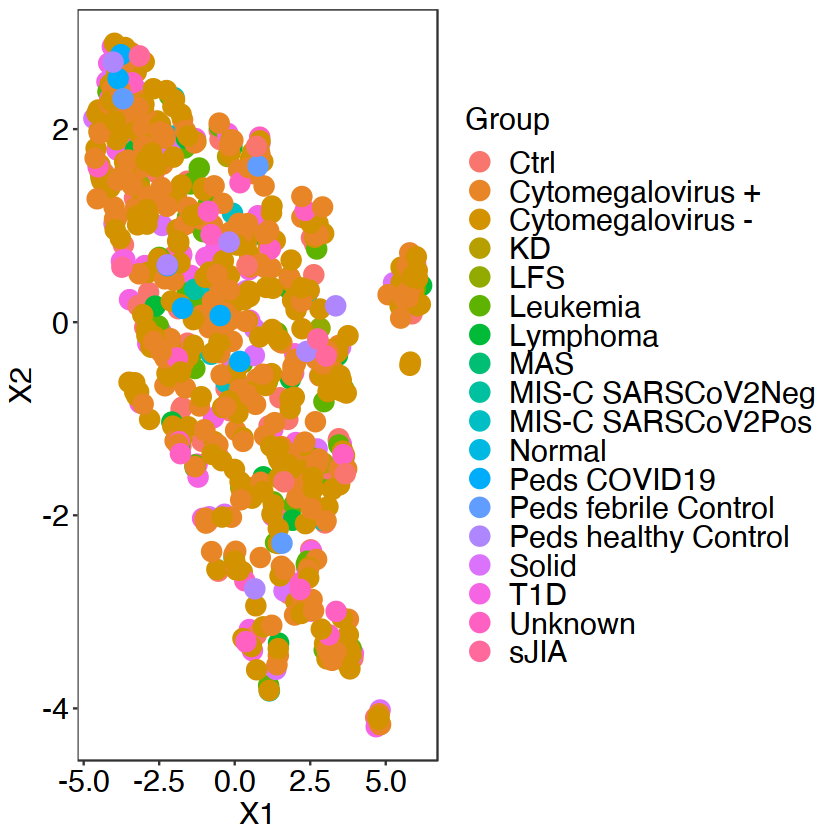

In [54]:
M3C::umap(pat_type, scale = 2,seed = 1, labels = as.factor(
    discovery_metadata$disease[match(colnames(pat_type), 
discovery_metadata$sample_name)]))

In [16]:
dim(pat_type)

[1] 273 831

In [21]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [27]:
res.pca <- prcomp(t(pat_type), scale = TRUE)

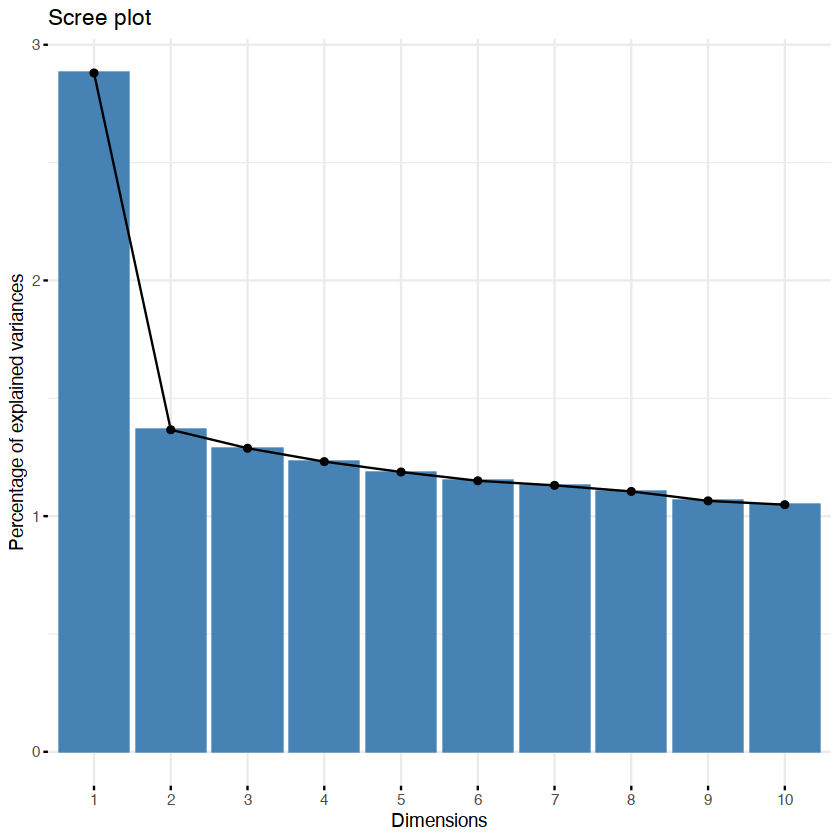

In [28]:
fviz_eig(res.pca)


In [31]:
dim(gliph_meta)

[1] 5565   34

In [39]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Preterm_23_3,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_23_3
2,Preterm_25_5,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_25_5
3,Preterm_26_B_2,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_26_B_2
4,Preterm_27_4,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_27_4
5,Adult_1_15-04,39,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,Adult_2_15-07,39,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [41]:
tail(discovery_metadata$disease[match(colnames(pat_type), 
discovery_metadata$sample_name)])

[1] "Ctrl" "Ctrl" "sJIA" "sJIA" "sJIA" "sJIA"

Warning message:
"Removed 19 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


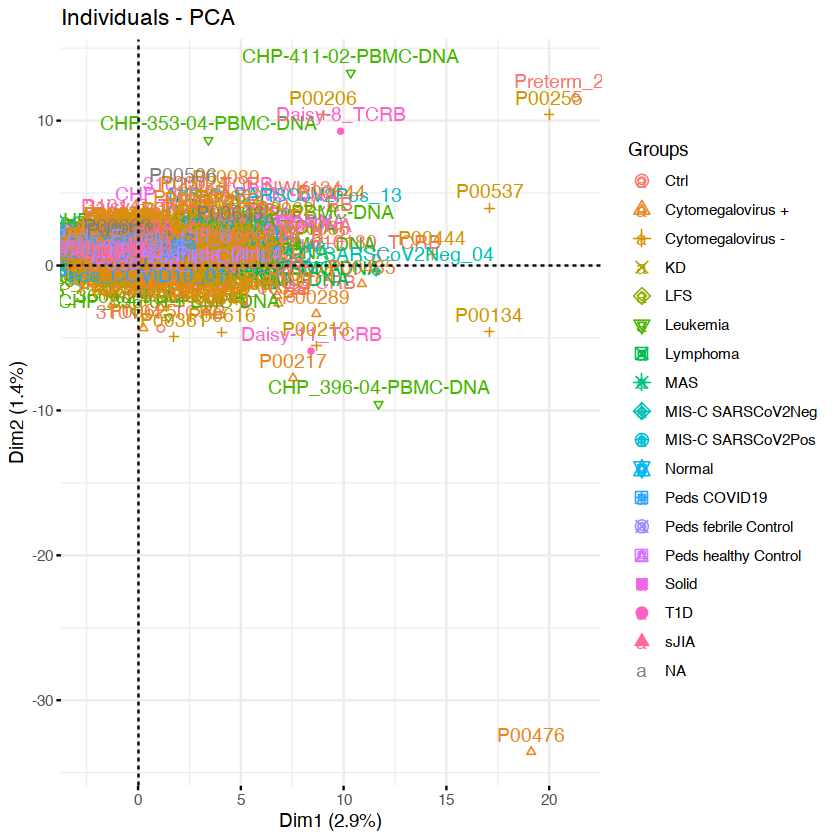

In [43]:
groups <- as.factor(discovery_metadata$disease[match(colnames(pat_type), 
discovery_metadata$sample_name)])
fviz_pca_ind(res.pca,
             col.ind = groups, # color by groups
            # palette = c("#00AFBB",  "#FC4E07"),
             addEllipses = F, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = F
             )

Warning message:
"ggrepel: 817 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 269 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


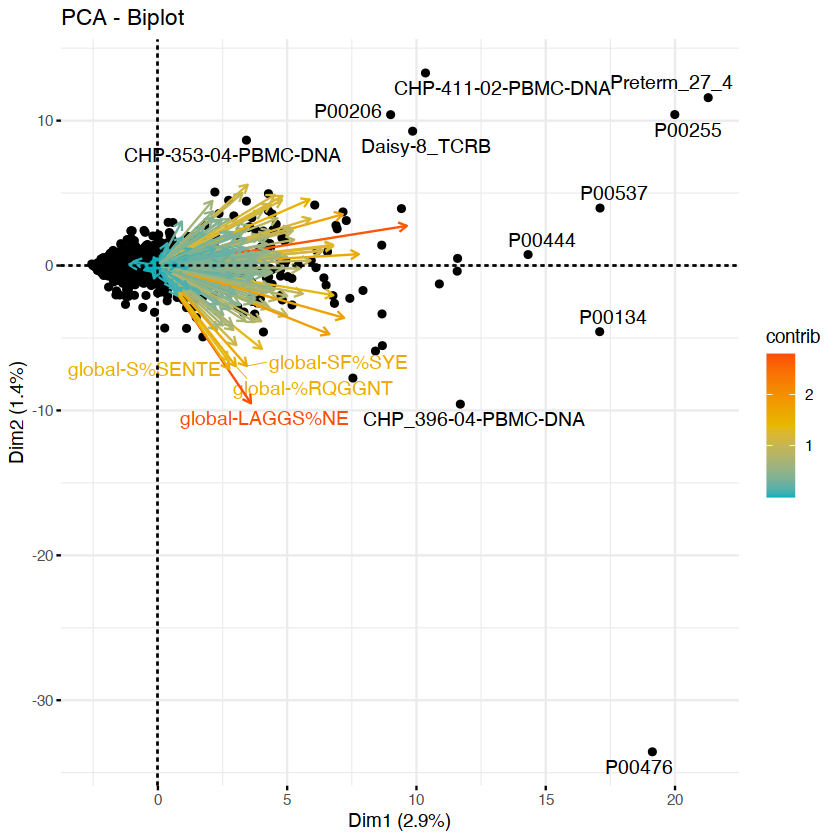

In [29]:
fviz_pca_biplot(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [18]:
tmp <- prcomp(pat_type)

In [20]:
head(TMP)

In [25]:
library("entropart")
#data("Paracou618")

get div based on gliph tcr groups

In [92]:
mymc <- MetaCommunity(Abundances = pat_type)

Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias 

In [105]:
mydiv <- DivPart(q=4, mymc)

In [106]:
alldivs <- mydiv$CommunityAlphaDiversities

In [107]:
alldivs[ names(alldivs) == "CHP_360-04_PBMC-DNA"]

CHP_360-04_PBMC-DNA 
           6.582852

In [108]:
discovery_metadata$diversity <- alldivs[match(discovery_metadata$sample_name, 
names(alldivs))]

In [109]:
table(discovery_metadata$disease, useNA = "always")


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                 114                  289                  352 
                  KD                  LFS             Leukemia 
                   5                    5                   66 
            Lymphoma                  MAS    MIS-C SARSCoV2Neg 
                  22                    3                    5 
   MIS-C SARSCoV2Pos               Normal         Peds COVID19 
                  19                    7                   10 
Peds febrile Control Peds healthy Control                Solid 
                   6                    7                   40 
                 T1D                 sJIA                 <NA> 
                 116                    7                   25 

In [23]:
#gliph_meta_dedup <- gliph_meta_dedup[ gliph_meta_dedup$disease != "LFS",]

In [110]:
pairwise.wilcox.test( discovery_metadata$diversity, 
discovery_metadata$disease, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
W


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  discovery_metadata$diversity and discovery_metadata$disease 

                     Ctrl  Cytomegalovirus + Cytomegalovirus - KD    LFS  
Cytomegalovirus +    0.309 -                 -                 -     -    
Cytomegalovirus -    0.321 0.916             -                 -     -    
KD                   0.822 0.997             1.000             -     -    
LFS                  0.993 0.834             0.809             0.753 -    
Leukemia             0.974 0.376             0.374             0.717 0.979
Lymphoma             0.385 0.648             0.649             0.857 0.590
MAS                  0.075 0.123             0.104             0.241 0.237
MIS-C SARSCoV2Neg    0.977 0.752             0.818             1.000 0.805
MIS-C SARSCoV2Pos    0.362 0.581             0.561             0.803 0.690
Normal               0.075 0.123             0.104             0.241 0.237
Peds COVID19         0.04

Warning message:
"Removed 267 rows containing non-finite values (stat_boxplot)."


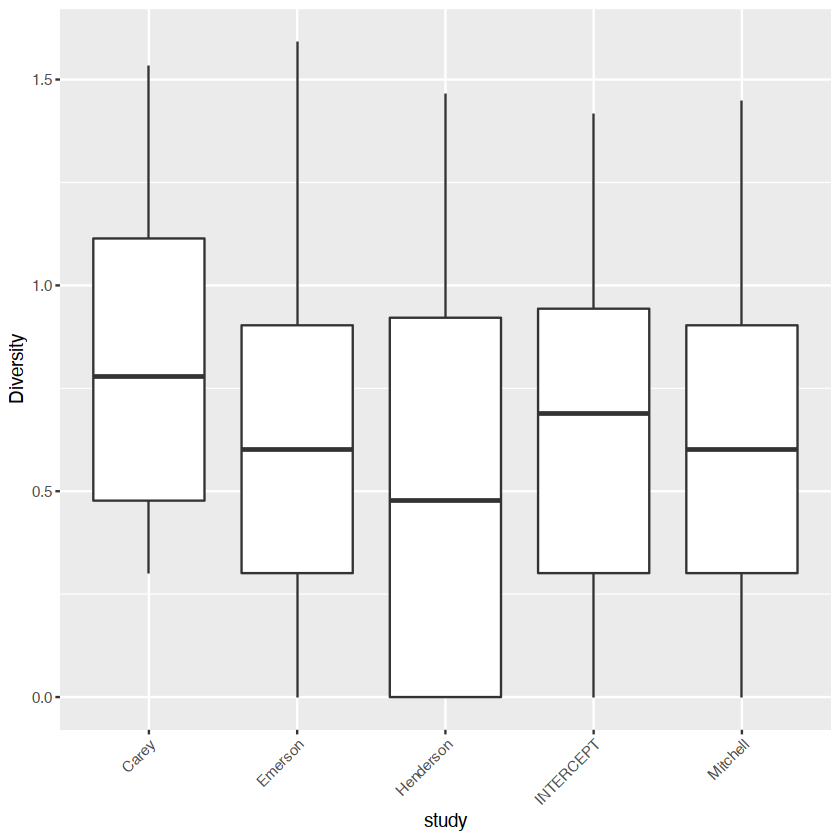

In [73]:
# boxplot of diversity by disease
ggplot(discovery_metadata, aes(x = study, y = log10(diversity))) + 
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  ylab("Diversity")


In [28]:
pairwise.wilcox.test(gliph_meta_dedup$diversity, 
gliph_meta_dedup$disease, p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"
W


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  gliph_meta_dedup$diversity and gliph_meta_dedup$disease 

                     Ctrl    Cytomegalovirus + Cytomegalovirus - LFS    
Cytomegalovirus +    < 2e-16 -                 -                 -      
Cytomegalovirus -    < 2e-16 0.46019           -                 -      
LFS                  0.10579 0.96350           1.00000           -      
Leukemia             2.6e-07 0.27768           0.26052           0.68506
Lymphoma             0.00107 0.99559           0.83428           1.00000
MIS-C SARSCoV2Neg    0.52980 0.27768           0.27768           0.77647
MIS-C SARSCoV2Pos    1.00000 0.07650           0.07701           0.30507
Normal               0.52980 0.27768           0.27768           0.77647
Peds COVID19         0.28273 0.03932           0.04017           0.27768
Peds febrile Control 0.52980 0.27768           0.27768           0.77647
Peds healthy Control 0.24113 0.42271           0.50

In [44]:
tapply(gliph_meta_dedup$diversity, gliph_meta_dedup$disease, summary)

$Ctrl
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.428   6.000  16.605 

$`Cytomegalovirus +`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.036   5.000  11.685 

$`Cytomegalovirus -`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.828   5.000  13.000 

$KD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.762   3.752   5.000   6.000 

$LFS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   7.000   8.706   8.541  11.000  13.000 

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   17.47   22.81   25.93   32.81   66.96 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.50   18.82   20.88   27.66   61.73 

$MAS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00    6.25    6.50    6.50    6.75    7.00 

$`MIS-C SARSCoV2Neg`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0     5.0     5.0     6.4     6.0    12.0 

$`MIS-

In [45]:
apply(pat_type, 1, function(x) table(unlist(x)))

$`global-%DRPNTE`

  0   1 
958   7 

$`global-%EGGAGNQP`

  0   1   2 
962   2   1 

$`global-%EGGE`

  0   1 
957   8 

$`global-%ET`

  0   1 
956   9 

$`global-%GGPNTGE`

  0   1 
959   6 

$`global-%PRDT`

  0   1   2 
961   3   1 

$`global-%REGRE`

  0   1 
961   4 

$`global-%WGGE`

  0   1 
955  10 

$`global-%WGGNE`

  0   1 
960   5 

$`global-A%RDT`

  0   1 
961   4 

$`global-G%VGE`

  0   1 
960   5 

$`global-GGT%`

  0   1 
959   6 

$`global-GR%`

  0   1 
960   5 

$`global-GTP%GE`

  0   1   2 
962   2   1 

$`global-NS%`

  0   1 
961   4 

$`global-RGLAGY%E`

  0   1 
960   5 

$`global-RPGT%NTE`

  0   1 
958   7 

$`global-RQ%GG`

  0   1 
959   6 

$`global-S%`

  0   1   2   3 
950  13   1   1 

$`global-S%ADT`

  0   1 
945  20 

$`global-S%AGE`

  0   1   2 
940  24   1 

$`global-S%AGGNSP`

  0   1 
960   5 

$`global-S%AGSGANV`

  0   1 
957   8 

$`global-S%ATGSGANV`

  0   1 
961   4 

$`global-S%AYE`

  0   1   2 
930  33   2 

$`global-S%DRANEK`

  0 

In [20]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(gliph_data_matrix_df, weighted = T )

In [21]:
# match the subject to the TcRb
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    gliph_all$subject[match(x, gliph_all$TcRb)]})

In [22]:
# match the subject to the GLIPH type
V(gliph_data_igrf)$subject[is.na(V(gliph_data_igrf)$subject)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$subject)], function(x){
    gliph_all$subject[match(x, gliph_all$type)]
})

In [23]:
head(V(gliph_data_igrf)$name)

[1] "global-%A"   "global-%AE"  "global-%AG"  "global-%ANV" "global-%D"  
[6] "global-%DR"

In [24]:
tail(V(gliph_data_igrf)$subject)

[1] "P00602"      "P00065"      "310243_TCRB" "310109_TCRB" "P00642"     
[6] "310168_TCRB"

In [25]:
head(all_metadata)

,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PBMC,Carey,NA,Male,Ctrl,Preterm_23_3
2,PBMC,Carey,NA,Female,Ctrl,Preterm_25_5
3,PBMC,Carey,NA,Male,Ctrl,Preterm_26_B_2
4,PBMC,Carey,NA,Female,Ctrl,Preterm_27_4
5,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [26]:
table(all_metadata$disease)


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                 119                  340                  420 
                  KD                  LFS             Leukemia 
                   5                   10                  275 
            Lymphoma                  MAS    MIS-C SARSCoV2Neg 
                 103                    3                    5 
   MIS-C SARSCoV2Pos               Normal         Peds COVID19 
                  19                   14                   10 
Peds febrile Control Peds healthy Control                Solid 
                   6                    7                  183 
                 T1D      Type 1 Diabetes                 sJIA 
                 116                  143                    7 

In [27]:
V(gliph_data_igrf)$disease <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$disease[match(x, all_metadata$sample_name)]})


In [28]:
V(gliph_data_igrf)$study <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$study[match(x, all_metadata$sample_name)]})

In [29]:
V(gliph_data_igrf)$sampletype <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$sampletype[match(x, all_metadata$sample_name)]})

In [30]:
table(V(gliph_data_igrf)$disease)


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                2508                 5654                 6984 
                  KD                  LFS             Leukemia 
                 125                    5                  156 
            Lymphoma                  MAS    MIS-C SARSCoV2Neg 
                  18                   61                   85 
   MIS-C SARSCoV2Pos         Peds COVID19 Peds febrile Control 
                 275                  130                   84 
Peds healthy Control                Solid                  T1D 
                  95                   30                 2606 
                sJIA 
                 103 

In [31]:
gliph_data_igrf

IGRAPH 2a16546 UNWB 19336 26010 -- 
+ attr: type (v/l), name (v/c), subject (v/c), disease (v/c), study
| (v/c), sampletype (v/c), weight (e/n)
+ edges from 2a16546 (vertex names):
 [1] global-%A--CAATAQIF global-%A--CAGRAQFF global-%A--CAKEAQSK
 [4] global-%A--CALVAQHF global-%A--CANAACTF global-%A--CAPAAVHF
 [7] global-%A--CAPGAWFF global-%A--CAPRAQHF global-%A--CAPSAQYF
[10] global-%A--CARGAAFF global-%A--CARGAQFF global-%A--CARKAAFF
[13] global-%A--CARLAAFF global-%A--CARLAQYF global-%A--CARRALHF
[16] global-%A--CARRAQYF global-%A--CASGAAFF global-%A--CASGADTF
[19] global-%A--CASGAGHF global-%A--CASGAGVF global-%A--CASGAHTF
+ ... omitted several edges

# Communities of GLIPH specificity groups

In [32]:
bipartite.projection(gliph_data_igrf)$proj1

IGRAPH df08c83 UNW- 207 373 -- 
+ attr: name (v/c), subject (v/c), disease (v/c), study (v/c),
| sampletype (v/c), weight (e/n)
+ edges from df08c83 (vertex names):
 [1] global-%A --global-T%  global-%A --global-R%  global-%A --global-V% 
 [4] global-%A --global-A%  global-%A --global-G%  global-%A --global-S% 
 [7] global-%A --global-K%  global-%A --global-L%  global-%A --global-H% 
[10] global-%A --global-Y%  global-%AE--global-T%E global-%AE--global-R%E
[13] global-%AE--global-L%E global-%AE--global-S%E global-%AE--global-N%E
[16] global-%AE--global-A%E global-%AE--global-E%E global-%AE--global-V%E
[19] global-%AE--global-Y%E global-%AE--global-H%E global-%AG--global-S%G
+ ... omitted several edges

In [33]:
myg <- (bipartite.projection(gliph_data_igrf)$proj1)

In [34]:
myg1 <- myg#delete_vertices( myg, degree(myg) == 0)

In [35]:
myk <- cluster_louvain(myg1, resolution = 1, weights = NULL)

In [36]:
#myk <- cluster_edge_betweenness(myg1)


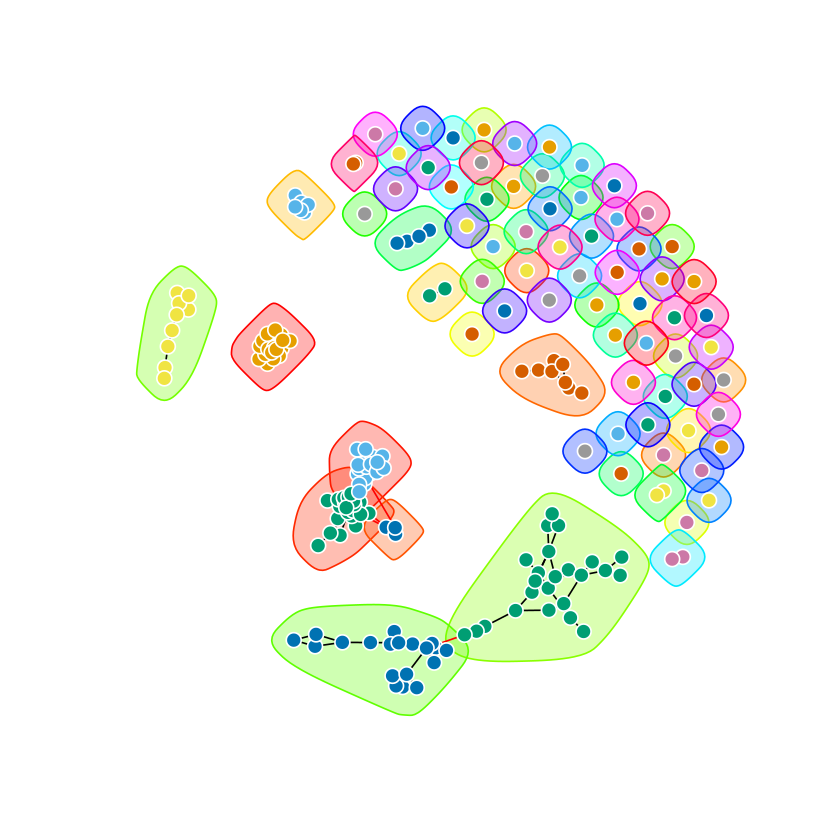

In [37]:
plot(myk, myg1, vertex.label=NA, vertex.frame.color="white", vertex.size=5)

In [38]:
V(myg1)$community <- as.character(myk$membership)

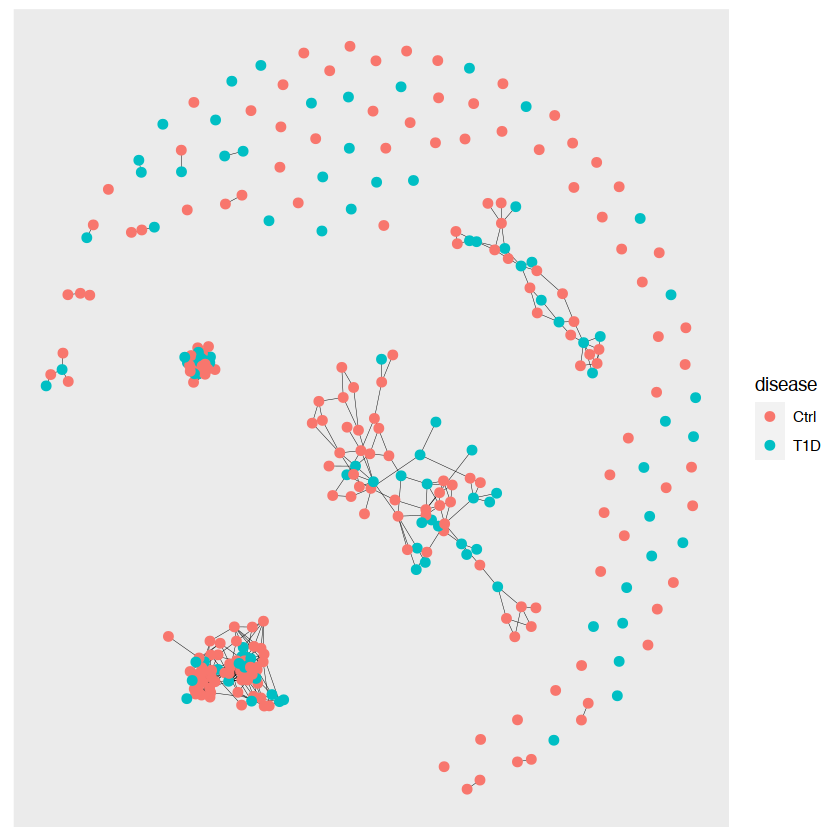

In [39]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = disease), size = 2)

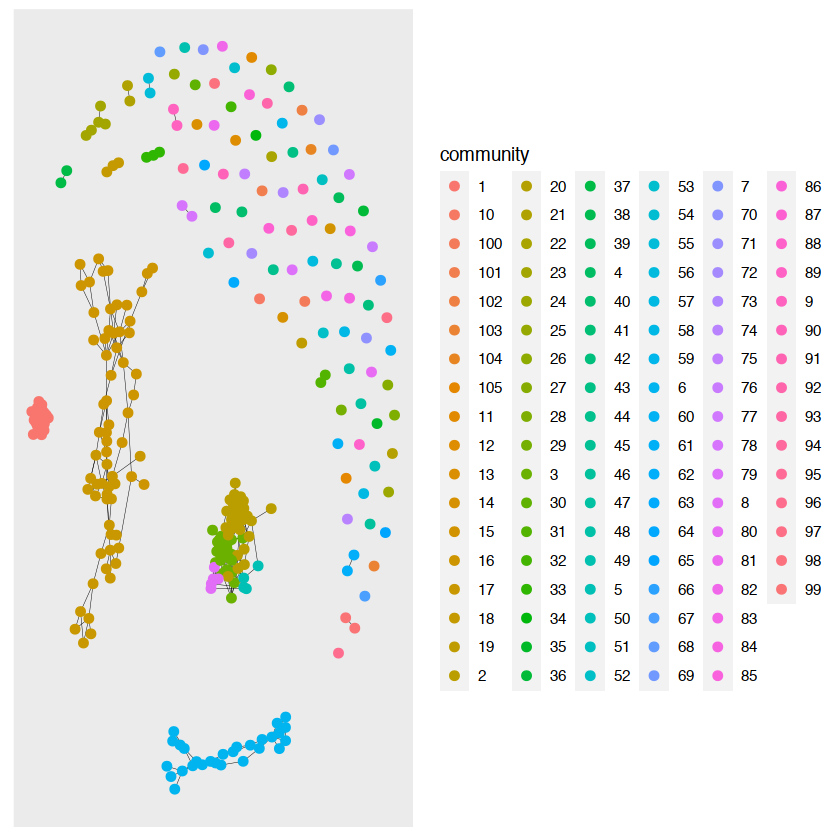

In [40]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)

In [41]:
head(all_metadata)

,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PBMC,Carey,NA,Male,Ctrl,Preterm_23_3
2,PBMC,Carey,NA,Female,Ctrl,Preterm_25_5
3,PBMC,Carey,NA,Male,Ctrl,Preterm_26_B_2
4,PBMC,Carey,NA,Female,Ctrl,Preterm_27_4
5,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [42]:
head(gliph_all[,10:20])

,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Freq,CDR3b,TRBV
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>
1,0.95,0.001,1e-05,global-%Q,CASTQAFF,TRBV07-09,TRBJ01-01,NA,0,CASTQAFF,TRBV07-09
2,0.11,0.001,1e-05,global-T%,CASTQAFF,TRBV07-09,TRBJ01-01,NA,0,CASTQAFF,TRBV07-09
3,0.95,0.001,1e-05,global-%NT,CATLNTIYF,TRBV24-01,TRBJ01-03,NA,0,CATLNTIYF,TRBV24-01
4,0.13,0.760,1e-05,motif-IWW,CASSEIWWEGLNEQFF,TRBV06-01,TRBJ02-01,NA,0,CASSEIWWEGLNEQFF,TRBV06-01
5,0.81,0.001,1e-05,global-SF%,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,0,CASSFPLHF,TRBV07-09
6,0.68,0.001,1e-05,global-S%P,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,0,CASSFPLHF,TRBV07-09


# Communities of subjects based on their correlation

In [43]:
head(gliph_all)

,Sample,index.x,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,⋯,TcRa,Freq,CDR3b,TRBV,TRBJ,count,clonefraction,subject,file,index.y
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,310101_TCRB:7470108,54,%Q,1.3e-06,182,169,9.5e-09,1,1,0.95,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
2,310101_TCRB:7470108,5,T%,1.4e-20,391,387,1.1e-09,1,1,0.11,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
3,310101_TCRB:7470791,164,%NT,1.9e-04,94,94,9.5e-09,1,1,0.95,⋯,NA,0,CATLNTIYF,TRBV24-01,TRBJ01-03,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470791
4,310101_TCRB:7471085,83,IWW,1.2e-05,63,64,1.0e-06,1,1,0.13,⋯,NA,0,CASSEIWWEGLNEQFF,TRBV06-01,TRBJ02-01,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471085
5,310101_TCRB:7471842,52,SF%,1.2e-06,142,118,8.1e-09,1,1,0.81,⋯,NA,0,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471842
6,310101_TCRB:7471842,17,S%P,6.4e-11,314,292,6.8e-09,1,1,0.68,⋯,NA,0,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471842


In [39]:
gliph_meta <- merge(gliph_all, all_metadata, by.x = "subject", by.y = "sample_name")

In [40]:
gliph_meta$patient <- gsub(":.*", "", gliph_meta$Sample)

In [41]:
dim(gliph_meta)

[1] 34423    32

Make an sample x cluster frequency matrix 

In [42]:
mymat <- matrix(nrow = length(unique(gliph_meta$patient)), ncol = length(unique(gliph_meta$type)),
               dimnames = list(unique(gliph_meta$patient), unique(gliph_meta$type)))

In [43]:
dim(mymat)

[1] 1023  207

In [44]:
for(s in unique(gliph_meta$patient)){
    mysample <- gliph_meta[ gliph_meta$patient == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [45]:
length(unique(gliph_all$type))

[1] 207

In [46]:
dim(mymat)

[1] 1023  207

In [47]:
summary(colSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  325.0   871.0   920.0   884.2   949.5  1006.0 

In [48]:
# keep clusters in at least two samples
#mymat <- mymat[,colSums(is.na(mymat)) <= 1020]

In [49]:
summary(rowSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  148.0   173.0   179.0   178.9   184.0   206.0 

In [50]:
#keep samples with at least two clusters
#mymat <- mymat[rowSums(is.na(mymat)) <= 182,]

In [51]:
dim(mymat)

[1] 1023  207

In [52]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [53]:
mymat[ mymat > 1] <- 1

In [54]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

### heatmap

In [55]:
summary(as.vector(mycormat))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.25285  0.02563  0.08944  0.09078  0.15074  1.00000 

In [56]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [57]:
summary(as.vector(mycormat))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02563 0.08944 0.09744 0.15074 1.00000 

In [58]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [59]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [60]:
#dedup for heatmap
gliph_meta_dedup <- gliph_meta[!duplicated(gliph_meta$patient),]

In [61]:
dim(gliph_meta_dedup)

[1] 1023   32

In [62]:
rownames(gliph_meta_dedup) <- (gliph_meta_dedup$patient)

In [63]:
gliph_meta_dedup <- gliph_meta_dedup[colnames(mycormat),]

In [64]:
dim(gliph_meta_dedup)

[1] 1023   32

In [65]:
mycohort <- makematrix_4hm(gliph_meta_dedup, "disease", "disease")
#mycycle <- makematrix_4hm(all_metadata, "cycle", "Cycle")
mysample <- makematrix_4hm(gliph_meta_dedup, "sampletype", "Sample type")
mygroup <- makematrix_4hm(gliph_meta_dedup, "study", "Study")

In [66]:
#cycle_col <- c("#bec2be", cycle_col)
#names(cycle_col)[1] <- "X00"

In [67]:
names(table(gliph_meta_dedup$disease))

[1] "Ctrl"                 "Cytomegalovirus +"    "Cytomegalovirus -"   
 [4] "KD"                   "LFS"                  "Leukemia"            
 [7] "Lymphoma"             "MAS"                  "MIS-C SARSCoV2Neg"   
[10] "MIS-C SARSCoV2Pos"    "Peds COVID19"         "Peds febrile Control"
[13] "Peds healthy Control" "Solid"                "T1D"                 
[16] "sJIA"

In [68]:
group_col <- c("blue", "red", "green", "orange", "purple")
names(group_col) <- names(table(gliph_meta_dedup$study))

In [69]:
cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
"brown", "cyan", "magenta", "navy", "maroon", "gray","gold") 
names(cohort_col) <- names(table(gliph_meta_dedup$disease))

In [70]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))

#cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))

#sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))

group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [71]:
#mypts <- makematrix_4hm(meta_div, "Patient", "Patient")

In [72]:
#pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [73]:
hm <- Heatmap(mycormat, show_row_names = TRUE, row_names_gp = gpar(fontsize = 3), column_names_gp = gpar(fontsize = 3))

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



In [74]:
pdf(paste0(plotpath, "heatmap_gliph.pdf"), width = 10, height = 10)
hm %v% group_hm %v% cohort_hm# %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2